# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pdf
import seaborn as sns
import h5py

## Data Preprocessing

### Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Projelerim\\Yaprak_Siniflandirma\\VeriSeti\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1391 files belonging to 26 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Projelerim\\Yaprak_Siniflandirma\\VeriSeti\\Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1391 files belonging to 26 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [5]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=26,activation='softmax'))

### Compiling and Training Phase

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20


44/44 [==============================] - 97s 2s/step - loss: 3.2709 - accuracy: 0.1438 - val_loss: 2.3761 - val_accuracy: 0.4364
Epoch 2/20
44/44 [==============================] - 97s 2s/step - loss: 2.0086 - accuracy: 0.4242 - val_loss: 1.3002 - val_accuracy: 0.6183
Epoch 3/20
44/44 [==============================] - 104s 2s/step - loss: 1.3112 - accuracy: 0.6197 - val_loss: 0.8252 - val_accuracy: 0.7426
Epoch 4/20
44/44 [==============================] - 95s 2s/step - loss: 1.0192 - accuracy: 0.6801 - val_loss: 0.5942 - val_accuracy: 0.8160
Epoch 5/20
44/44 [==============================] - 109s 2s/step - loss: 0.6687 - accuracy: 0.7937 - val_loss: 0.3490 - val_accuracy: 0.8950
Epoch 6/20
44/44 [==============================] - 100s 2s/step - loss: 0.5983 - accuracy: 0.8174 - val_loss: 0.2605 - val_accuracy: 0.9152
Epoch 7/20
44/44 [==============================] - 97s 2s/step - loss: 0.4819 - accuracy: 0.8426 - val_loss: 0.2710 - val_accuracy: 0.9166
Epoch 8/20
44/4

## Evaluating Model

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

44/44 [==============================] - 22s 480ms/step - loss: 0.0147 - accuracy: 0.9986
Training accuracy: 0.9985621571540833


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

44/44 [==============================] - 22s 475ms/step - loss: 0.0147 - accuracy: 0.9986
Validation accuracy: 0.9985621571540833


### Saving Model

In [30]:
cnn.save('trained_model.keras')

ImportError: h5py must be installed in order to save a model.

In [ ]:
training_history.history #Return Dictionary of history

{'loss': [3.001404047012329,
  1.8503702878952026,
  1.2265197038650513,
  0.9158289432525635,
  0.6549487113952637,
  0.5722495913505554,
  0.47649070620536804,
  0.3980029821395874,
  0.33736106753349304,
  0.26467642188072205,
  0.192859947681427,
  0.17773780226707458,
  0.14388112723827362,
  0.16845791041851044,
  0.12252844870090485,
  0.13884472846984863,
  0.1415926218032837,
  0.07864844799041748,
  0.07931797951459885,
  0.06753711402416229],
 'accuracy': [0.15600287914276123,
  0.46585190296173096,
  0.6247304081916809,
  0.7153127193450928,
  0.7958303093910217,
  0.8181164860725403,
  0.8612508773803711,
  0.8734723329544067,
  0.8928828239440918,
  0.920201301574707,
  0.9388929009437561,
  0.949676513671875,
  0.9568655490875244,
  0.9453630447387695,
  0.951833188533783,
  0.9568655490875244,
  0.951833188533783,
  0.9734004139900208,
  0.9748382568359375,
  0.9805895090103149],
 'val_loss': [2.077115535736084,
  1.1473370790481567,
  0.6710893511772156,
  0.4380482137

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

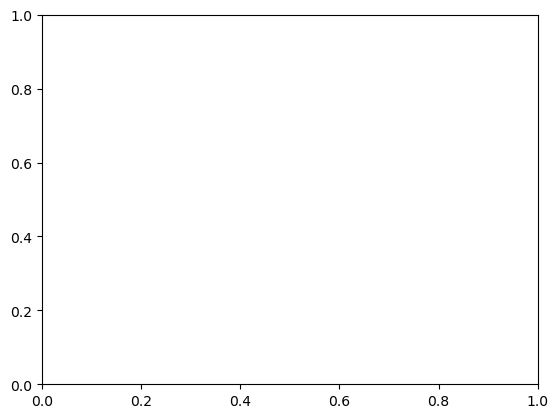

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Projelerim\\Yaprak_Siniflandirma\\VeriSeti\\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2211 files belonging to 40 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2211/2211 [==============================] - 72s 32ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(2211,), dtype=int64, numpy=array([ 0,  0,  0, ..., 39, 39, 39], dtype=int64)>

In [ ]:
predicted_categories

<tf.Tensor: shape=(2211,), dtype=int64, numpy=array([ 0,  0,  0, ..., 39, 39, 39], dtype=int64)>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                  precision    recall  f1-score   support

  Anhui Barberry       1.00      1.00      1.00        65
      AriveDantu       1.00      0.95      0.97       122
           Rasna       0.94      1.00      0.97        44
           apple       1.00      0.80      0.89        10
          basale       0.98      1.00      0.99       103
           betel       0.98      0.96      0.97        48
          carrot       1.00      0.90      0.95        10
          cherry       1.00      0.80      0.89        10
   crape jasmine       0.95      0.93      0.94        56
           curry       0.94      0.98      0.96        60
       drumstick       1.00      0.99      0.99        77
       fenugreek       1.00      1.00      1.00        36
 goldenrain tree       0.95      0.98      0.97        59
           guava       1.00      1.00      1.00        65
        hibiscus       0.93      1.00      0.97        43
    indian beech       0.97      1.00      0.98        61
  indian must

### Confusion Matrix Visualization

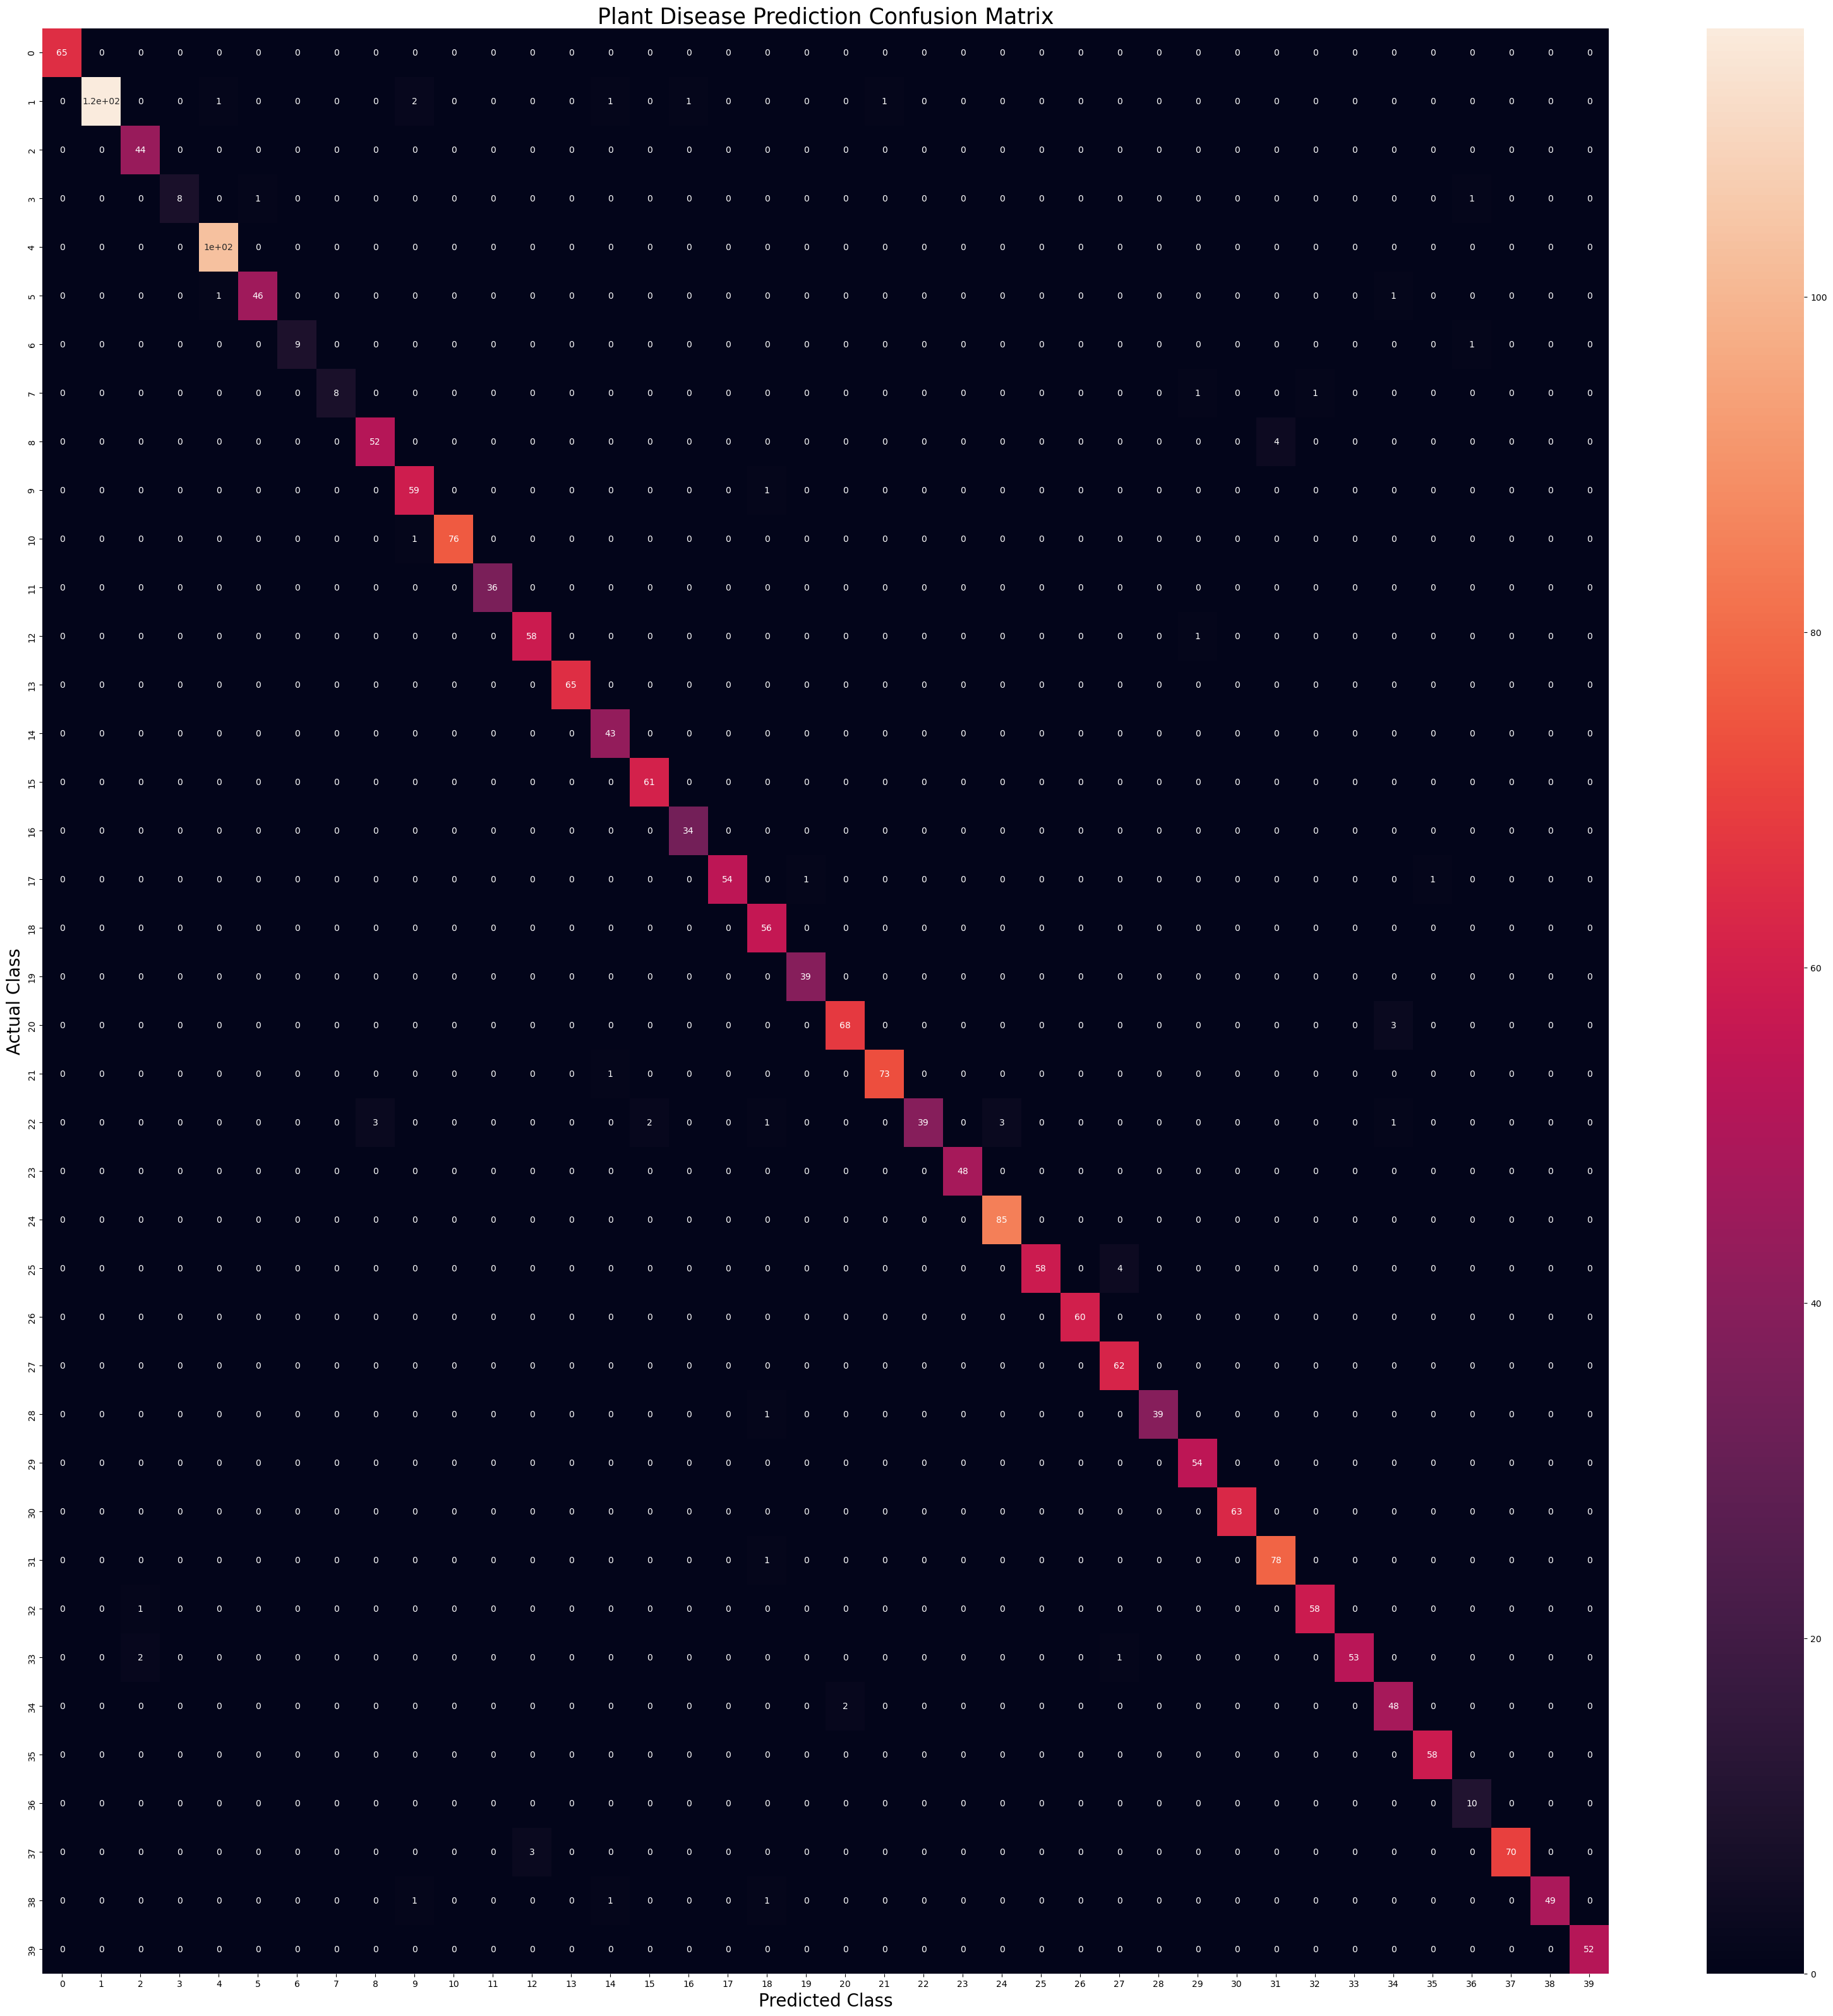

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()